In [2]:
import pandas as pd
import requests

In [3]:
#loading the stock tickers into a data frame
symbols_stock = pd.read_csv("list_stock.csv")

#removing the unnecessary character
symbols_stock['Symbol'] = symbols_stock['Symbol'].str.replace('^', '')

display(symbols_stock.shape)

C:\Users\adamm\AppData\Local\Temp\ipykernel_19228\982236273.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  symbols_stock['Symbol'] = symbols_stock['Symbol'].str.replace('^', '')


(5807, 1)

In [5]:
#define the size of the chunk
size_chunk = 100

#making the data frame into chunks of 100
chunk_symbols = [symbols_stock[i:i+size_chunk] for i in range(0, symbols_stock.shape[0], size_chunk)]


In [7]:
#example of the chunk
chunk_example = list(chunk_symbols[0]['Symbol'])

#display the first 5 items
chunk_example[:5]

['A', 'AA', 'AABA', 'AAC', 'AAL']

In [40]:
#define api endpoint
endpoint = r"https://api.tdameritrade.com/v1/instruments"

#creating a dictionary to store all our information
dict_stock = {}

#looping through each seperated chunk
for chunk in chunk_symbols:

    #defining the payload
    payload = {'apikey': 'FQX83ZV1WGSC0VQRUTNDFR5WDICVMSYM',
                'projection':'fundamental',
                'symbol':list(chunk['Symbol'])}
            
    #making a request
    content = requests.get(url = endpoint, params = payload)

    #converting the JSON to a dictionary
    data = content.json()
    
    #for any existing ones, this loops through each stock, to then retrieve data, and store in dictionary
    try:
        for stock in data:
            dict_stock[data[stock]['cusip']] = data[stock]['fundamental']
    except:
        continue

#creating a data frame with new data
df_stock = pd.DataFrame(dict_stock)


In [41]:
#transpose df
df_stock = df_stock.transpose()

#display df
display(df_stock.head())

display(df_stock.shape)

,symbol,high52,low52,dividendAmount,dividendYield,dividendDate,peRatio,pegRatio,pbRatio,prRatio,...,bookValuePerShare,shortIntToFloat,shortIntDayToCover,divGrowthRate3Year,dividendPayAmount,dividendPayDate,beta,vol1DayAvg,vol10DayAvg,vol3MonthAvg
037833100,AAPL,182.94,122.25,0.88,0.53,2022-02-04 00:00:00.000,27.76408,0.441891,37.98978,7.21368,...,0.0,0.0,0.0,0.0,0.22,2022-02-10 00:00:00.000,1.19688,74353570.0,74353570.0,1932837480.0
00773U108,ADVM,10.33,1.095,0.0,0.0,,0.0,0.0,0.35471,15.01011,...,0.0,0.0,0.0,0.0,0.0,,1.2529,1458480.0,1458484.0,22258240.0
05464C101,AAXN,177.705,50.051,0.0,0.0,,0.0,0.0,12.39082,17.69866,...,30.25857,0.0,0.0,0.0,0.0,,0.59526,1015010.0,0.0,12457720.0
003881307,ACTG,7.54,3.3,0.0,0.0,,1.84344,0.0,0.52016,2.35944,...,11.07401,0.0,0.0,0.0,0.0,,0.50311,261700.0,261695.0,6571440.0
464288182,AAXJ,96.39,67.99,1.82,2.53,2021-12-13 00:00:00.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.545766,2021-12-17 00:00:00.000,0.87806,829820.0,1464629.0,26253450.0


(4543, 46)

In [44]:
list_metrics = ['returnOnEquity','returnOnAssets','returnOnInvestment','symbol']

# select only those columns
df_indicators = df_stock[metrics_list]

# display the unedited DF
display(df_indicators.head())

#k means algorithms cannot handle missing or null values, so remove any rows that includes any
df_indicators = df_indicators[df_indicators[list_metrics] != 0]
df_indicators = df_indicators.dropna(how='any')

display(df_indicators.head())


,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
037833100,145.5673,27.35279,44.18407,AAPL
00773U108,0.0,0.0,0.0,ADVM
05464C101,0.0,0.0,0.0,AAXN
003881307,34.10444,22.95363,31.22609,ACTG
464288182,0.0,0.0,0.0,AAXJ


,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
037833100,145.5673,27.35279,44.18407,AAPL
003881307,34.10444,22.95363,31.22609,ACTG
00770C101,51.92701,36.35455,45.22913,ADES
00081T108,12.67807,3.31922,4.18094,ACCO
049164205,19.45687,7.91052,9.96078,AAWW


In [45]:
#setting the index
df_indicators = df_indicators.set_index('symbol')

#converting dataframe to float values
df_indicators = df_indicators.astype('float')

df_indicators.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAPL,145.56730,27.35279,44.18407
ACTG,34.10444,22.95363,31.22609
ADES,51.92701,36.35455,45.22913
ACCO,12.67807,3.31922,4.18094
AAWW,19.45687,7.91052,9.96078


In [49]:
#defining filters
filter_roe = df_indicators.iloc[:,0] < 40
filter_roi = df_indicators.iloc[:,0] < 30
filter_roa = df_indicators.iloc[:,0] < 30

#retrieving the count for each column 
count_roe = pd.Series(filter_roe).value_counts()
count_roi = pd.Series(filter_roe).value_counts()
count_roa = pd.Series(filter_roe).value_counts()

#displaying results
display(count_roe)
display(count_roa)
display(count_roi)

True     1777
False     299
Name: returnOnEquity, dtype: int64

True     1777
False     299
Name: returnOnEquity, dtype: int64

True     1777
False     299
Name: returnOnEquity, dtype: int64

In [53]:
#filtering whole dataframe
df_indicators = df_indicators[filter_roe & filter_roa & filter_roi]

#displaying initial values
df_indicators.head()

C:\Users\adamm\AppData\Local\Temp\ipykernel_19228\4232609714.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_indicators = df_indicators[filter_roe & filter_roa & filter_roi]


,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
ACCO,12.67807,3.31922,4.18094
AAWW,19.45687,7.91052,9.96078
ADUS,8.25712,4.90455,5.71730
AA,18.47451,5.84754,8.63873
AB,23.94360,23.89271,23.89271


In [54]:
#statistical summary
df_desc = df_indicators.describe()

#implementing standard deviation metric
df_desc.loc['+3_std'] = df_desc.loc['mean'] + (df_desc.loc['std'] * 3)
df_desc.loc['-3_std'] = df_desc.loc['mean'] - (df_desc.loc['std'] * 3)

df_desc

,returnOnEquity,returnOnAssets,returnOnInvestment
count,1627.000000,1627.000000,1627.000000
mean,12.470443,6.223212,7.803899
std,7.836499,4.747636,6.121875
min,0.004870,0.024410,0.026600
25%,6.196570,2.759800,3.437260
50%,11.231010,5.106200,6.367170
75%,18.230030,8.438140,10.834820
max,29.943280,29.644440,73.659810
+3_std,35.979940,20.466118,26.169524
-3_std,-11.039053,-8.019695,-10.561727


C:\Users\adamm\AppData\Local\Temp\ipykernel_19228\2257855552.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


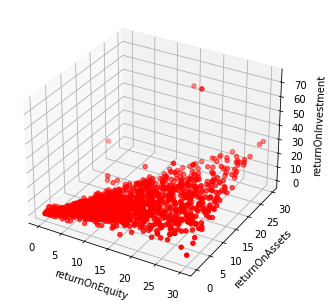

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#defining the figure
fig = plt.figure()
ax = Axes3D(fig)

#defining the axis
x = list(df_indicators.iloc[:,0])
y = list(df_indicators.iloc[:,1])
z = list(df_indicators.iloc[:,2])

#defining the axis labels
names_column = df_indicators.columns
ax.set_xlabel(names_column[0])
ax.set_ylabel(names_column[1])
ax.set_zlabel(names_column[2])

# defining scatter plot
ax.scatter(x, y, z, c='red', marker = 'o')

plt.show()

C:\Users\adamm\AppData\Local\Temp\ipykernel_19228\3626527700.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


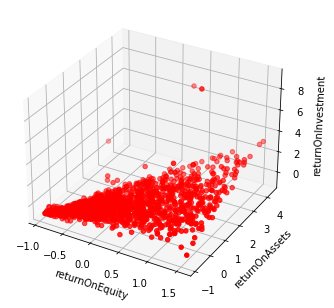

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#defining each scaler
scaler_min_max = MinMaxScaler()
scaler_std = StandardScaler()
scaler_robust = RobustScaler()

#scaling data
minmax_X_train = scaler_min_max.fit_transform(df_indicators)
standard_X_train = scaler_std.fit_transform(df_indicators)
robust_X_train = scaler_robust.fit_transform(df_indicators)

#defining the figure
fig = plt.figure()
ax = Axes3D(fig)

#defining the axis
x = robust_X_train[:,0]
y = robust_X_train[:,1]
z = robust_X_train[:,2]

#defining the axis labels
names_column = df_indicators.columns
ax.set_xlabel(names_column[0])
ax.set_ylabel(names_column[1])
ax.set_zlabel(names_column[2])

# defining scatter plot
ax.scatter(x, y, z, c='red', marker = 'o')

plt.show()

In [66]:
from sklearn import metrics
from sklearn.cluster import KMeans

#creating a dictionary - storing scores
dict_results = {}

#defining iterations
clusters_num = 10

#running through each k
for k in range(2, clusters_num):

    print('-'*100)

    #define key for iteration
    dict_results[k] = {}

    #creating instance of model - kmeans
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(robust_X_train)

    #defining the silhouette score
    score_sil = metrics.silhouette_score(robust_X_train, kmeans.labels_, metric = 'euclidean')

    #storing metrics
    dict_results[k]['silhouette_score'] = score_sil
    dict_results[k]['intertia'] = kmeans.inertia_
    dict_results[k]['score'] = kmeans.score
    dict_results[k]['model'] = kmeans

    #displaying results
    print("The amount of clusters: {}".format(k))
    print("Silhouette Score: {}".format(score_sil))


----------------------------------------------------------------------------------------------------
The amount of clusters: 2
Silhouette Score: 0.5358573397383051
----------------------------------------------------------------------------------------------------
The amount of clusters: 3
Silhouette Score: 0.46226993982968734
----------------------------------------------------------------------------------------------------
The amount of clusters: 4
Silhouette Score: 0.41327661468299287
----------------------------------------------------------------------------------------------------
The amount of clusters: 5
Silhouette Score: 0.38470445781069823
----------------------------------------------------------------------------------------------------
The amount of clusters: 6
Silhouette Score: 0.37937255167655715
----------------------------------------------------------------------------------------------------
The amount of clusters: 7
Silhouette Score: 0.3922100934913337
------------